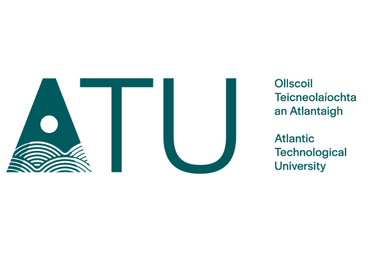

***
# Exploring Classification Algorithms with the Iris Dataset
***
### Machine Learning & Statistics Module, Computing in Data Analytics
### Eleanor Sammon G00411277
***

### TABLE OF CONTENTS

### Introduction

### Supervised Learning
- What is supervised learning
- labelled data
- relevance/implementation/importance of supervised learning in machine learning

## Understanding the Iris Dataset


### Overview of the Iris Dataset

Often referred to as the Fisher Iris Dataset and despite what the name suggests, it was in fact [Edgar Shannon Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson) (1897 - 1969) who, in the 1930s, collected the raw data which formed the basis of the famous iris data set.  Having secured a fellowship to study at the John Innes Horticultural Institute in Britain, Anderson met the statistician [Sir Ronald Aylmer Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) who went on to published a paper in 1936 proposing a methodological framework to delineate 'desirable' traits based on the Iris dataset and using the statistics originally gathered by Anderson.

There are between 200 and 300 species within the [iris](https://sites.berry.edu/cborer/inventory/iris/) genus so identifying them to this particular family can be challenging.  Most irises do have some shared characteristics however, first among them is the presence of six 'petals'. The inner three petals are referred to as “standards” while the outer three sepals, often mistaken for petals, are called “falls”. Sepals serve as protection for the flower in bud and as support for the petals when in bloom.

### Attributes of the Iris Data set

The [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) represents four measurements of floral morphology on 150 plants - 50 individuals for each of three genus (*Iris versicolor*, *Iris setosa*, and *Iris virginica*).  The numeric parameters which the dataset contains are sepal width, sepal length, petal width and petal length.  Classification accuracy is the ratio of number of correct predictions to the total number of input samples, it works best if there are equal number of samples belonging to each class which, in this case, there are.

Each row in the Iris dataset describes one flower for which there are four seperate measurements - the length and width of the sepals and the length and width of the petals.  The 5th column is the species of iris: *setosa, versicolor*, or *virginica*. 

The Fisher data set is described as the 'Hello World' for machine learning, useful for practicing basic machine learning algorithms.  It endures because the data is open source, the accuracy and origin are both known, it is 'real' data and with three types of flower, it allows for more than just binary classification.  Additionally, with an even 50 in each classification it is balanced and has no null or missing values.  All measurements are on the same scale (cm) so no normalisation is called for and the file size isn’t unwieldy or excessively complicated.  

### Data Exploration
- load the Iris dataset - scikit-learn
- basic statistics and information about the dataset
- visualise the dataset using plots (scatter plots, histograms)

<a name="4.-investigating-the-data-set"></a>
## My Investigation of the Data Set Using Python
My first step was to import the libaries that I felt would be most useful in manipulating the data.  The are as follows:
`numpy` - short for Numerical Python and used to perform a wide variety of mathematical operations on arrays
`pandas` - for data manipulation and analysis with data structures and operations for manipulating numerical tables and time series
`matplotlib.pyplot` - a plotting library for creating static, animated, and interactive visualizations in Python

Next I imported the data set from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) as iris.csv, read it in and did a quick print check to ensure it was working as intended.

In [20]:
# importing libraries which I expect to use
from enum import auto
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [7]:
data = pd.read_csv('iris.csv')
print (data)

     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


This data set being quite small, very famous and scrutinised to death I already know that the data is ship-shape for analysis and doesn't require any tidy-up but it seems also to be good practice when dealing with data to check for null values as a program encountering a null value may return an error and/or skew the analysis.  Missing values are usually represented in the form of Nan, null or None.

To establish null values I used the code `data.isna().sum()` which gives the sum of missing values. In this case, helpfully, none.  For argument's sake, had I encountered null values in this particular data set I likely would have used the median value to replace them. 


In [10]:
print(data.isna().sum())

Confirming that there are no missing or null values in the dataset:

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64


In [11]:
# Descriptive or summary statistics can be elicited using Pandas dataframe `describe()` 
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
## To get specific measurements for each species I can drill down using the groupby function and 
## narrow it down to show only the max and minimum values for each of the classes

print ("These are the minimum measurements for each class:\n")
print(data.groupby("Class").min())

print ("\n\nThese are the maximum measurements for each class:\n")
print(data.groupby("Class").max())

print ("\n\nThese are the mean measurements for each class:\n")
print(data.groupby("Class").mean())


These are the minimum measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa              4.3         2.3          1.0         0.1
Iris-versicolor          4.9         2.0          3.0         1.0
Iris-virginica           4.9         2.2          4.5         1.4


These are the maximum measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa              5.8         4.4          1.9         0.6
Iris-versicolor          7.0         3.4          5.1         1.8
Iris-virginica           7.9         3.8          6.9         2.5


These are the mean measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa            5.006       3.418        1.4

This useful function in `pandas` allows me to group the classes of species and then narrow it down to show only the minimum and maximum measurements for each.  I found these stats useful in that it gives the range of measurements and the mean values sketch the average dimensions for each species and already it is clear that *Iris setosa* is smaller, and by virtue of that, more distinctive than the other two species. 

## Basic Data Visualisation

### Histogram
A [histogram](https://asq.org/quality-resources/histogram) is a commonly used plotting tool to show frequency distributions in numerical data.  It visualises the distribution of values in a given dataset, the x-axis displaying the values in the dataset and the y-axis displaying the frequency of each value.  It differs from a bar chart in that it deals with quantitative data rather than categorical and elements are grouped together as ranges rather than individual entities, as they would be in a bar chart. In a histogram the data is allocated to bins, a series of intervals into which the data is effectively sorted.  Helpfully, the `pandas` in-built function `.hist()` plots histograms for the features in the dataset. In trying to establish the correct number of bins to specify I found a number of methods such as the Freedman–Diaconis rule, Sturges' rule and the Shimazaki-Shinomoto method to name but a few, and then I happened across the fact that there is an [`auto`](https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram) function, which uses the maximum of the Sturges and Freedman-Diaconis bin choice, so I quite happily deployed that instead!  

Text(0.5, 0.98, 'Histograms of the the Iris Data Set')

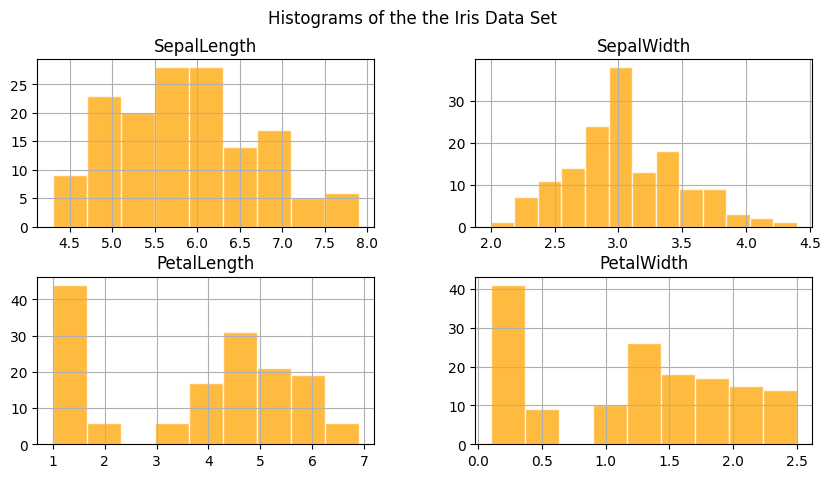

In [16]:
#dataframe.hist() from Pandas will generate a histogram of each column of variables
data.hist (alpha = 0.75, color = ['orange'], edgecolor='w', bins = 'auto', figsize=(10,5))
plt.suptitle("Histograms of the the Iris Data Set")

The histograms for petal length and petal width are remarkable similar and the standalone bars to the left represent Irish Setosa, well apart from the other two species making these quite distinctive classification features. The overlap between the species in terms of sepal length and sepal width is significant such that it's not as easy to distinguish the species in these two histograms. 

### Scatter plots
Scatter plots use a collection of points placed using Cartesian coordinates, basically a system used to locate a point, or points, in two-dimensional space from two variables.  By displaying a variable in each of the X and Y axis, we can clearly see if a relationship or correlation between the two variables exists. The useful thing about scatter plots is that they retain the exact data values and sample size. By colour coding the three species of iris in the plots, this distinction is even clearer. 

In [19]:
sns.pairplot (data, hue = "class")
plt.suptitle ("Scatterplots of Iris Data Set Variables\n\n")

NameError: name 'sns' is not defined

Specifying a colour for each species greatly helps in interpreting these scatterplots although even without it, it would be clear that *setosa* can be easily distinguised from *versicolor* and *virginica* on all the plots. While *versicolor* and *virginica* can still be seen as fairly distinct from each other in most cases, particularly when colour coded, they nonetheless have some slight overlap with each other or can at least be said to have a much closer correlation with each other than with *setosa*.  The notable exception to this is the scatterplot for sepal length and sepal width where *versicolor* and *virginica* overlap considerably.  Therefore, as classifiers between these two particular species, these are not as impactful or useful. 

### Classification Algorithms

#### What is Classification?
Classification is the process of recognising, understanding, and grouping ideas and objects into preset categories. Using pre-categorised training datasets, machine learning programs apply algorithms to classify future datasets into such categories. In machine learning, algorithms use the training data to predict the likelihood that subsequent data will fall into one of the predetermined categories (Dutta, 2022).

- explain goal of classification (assigning labels to data points)

#### Common Classification Algorithms
Below I have chosen six of the most commonly applied ML algorithms, given a brief overview of how they work and listed the advantages and disadvantages of each.

#### Logistic Regression
Logistic regression aims to solve classification problems by predicting categorical outcomes, usually where there are two outcomes (binomial) (W3schools).

Rout, A. (2022) lists the main advantages of logistic regression including that it is easy to implement, interpret, and efficient to train; it doesn't make assumptions about distributions of classes and it can extend to multinomial regression and a natural probabilistic view of class predictions. Logistic regression provides a measure of how appropriate a predictor is and also its direction of association (positive or negative). It demonstrates good accuracy for many simple data sets and performs well where a dataset is linearly separable. It can interpret model coefficients as indicators of feature importance and is less inclined to overfitting.

Clearly perhaps, as the author further expands, the main disadvantage of logistic regression lies in it's binary nature and the assumption of linearity between the dependent variable and the independent variables. It can only be used to predict discrete functions and cannot solve non-linear problems requiring average or no multicollinearity between independent variables. It can be difficult to identify and explain complex relationships using logistic regression - more powerful and compact algorithms, such as Neural Networks, are more efficient in such scenarios.

### Decision Tree

A decision tree is a type of non parametric model that can be used in machine learning for both classification and regression. It is used to categorise and/or make predictions based on how a previous set of questions were answered. Its name derives from its similarity in structure to a tree. The starting point is called the root node from which flows a series of decision nodes representing a question or split point and presenting decisions to be made. From the decision nodes are leaf nodes that represent the consequences or possible answers arising from those decisions (Masters in Data Science, no date).

In the opinion of Thorn, J (2020), the advantages of decision tree lies in their simplicity and ease of interpretation. They require less data than other algorithms to train and are tolerant to missing values. Additionally, as mentioned, they can be used for both classification and regression.

The author further outlines the drawbacks of decision tree being that they are prone to over-fitting and can be sensitive to outliers, perhaps more significant is that they are 'weak' learners. A single decision tree alone will not make for a very strong prediction model so multiple trees are often combined to make ‘forests’ giving rise to a stronger ensemble model such as random forest.

- pick one algorithm for detailed exploration [chosen algorithm]

#### [chosen algorithm]
- explain the concept of [chosen algorithm]
- discuss how [chosen algorithm] work for classification
- Gini impurity and entropy as criteria for splitting nodes?

#### Implementation of [chosen algorithm]
- import necessary libraries
- split dataset into training and testing sets
- create [chosen algorithm] classifier
- train the classifier on the training data
- evaluate the classifier's performance using accuracy, precision, recall, and F1-score
- visualize the [chosen algorithm]

### Model Evaluation

#### Performance Metrics
- explain the importance of performance metrics in model evaluation
- define accuracy, precision, recall, and F1-score
- calculate and interpret metrics for the [chosen algorithm] model

#### Confusion Matrix
- what is aconfusion matrix
- create and visualize the confusion matrix for the [chosen algorithm] model

### Comparison of Classification Algorithms

#### Implementing Other Algorithms
- choose another classification algorithm for comparison
- implement and train selected algorithm
- evaluate performance using the same metrics as for [chosen algorithm]

#### Model Comparison
- compare the performance of the [chosen algorithm] model and the second algorithm
- discuss the strengths and weaknesses of each algorithm
- consider scenarios - one algorithm preferable over the other?

### Conclusion


### References
***

Dutta, B. (2022) _Types of Classifiers in Machine Learning_. Available at: https://www.analyticssteps.com/blogs/types-classifiers-machine-learning (Accessed: 17 October 2023)

Master’s in Data Science (no date) _Machine Learning Algorithms - Decision tree_. Available at: https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree (Accessed: 19 October 2023)

Rout, A. (2022) _Advantages and Disadvantages of Linear Regression_. Available at: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression (Accessed: 25 December 2022)

Thorn, J. (2020) _Decision trees explained_. Available at: https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6 (Accessed: 19 October 2023)